<a href="https://colab.research.google.com/github/agfernandezb/ML2021I/blob/main/Entregable2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random as ran
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import sklearn
from sklearn import datasets

#Ejercicios Aprendizaje de Maquina

##Ejercicio 1.12  

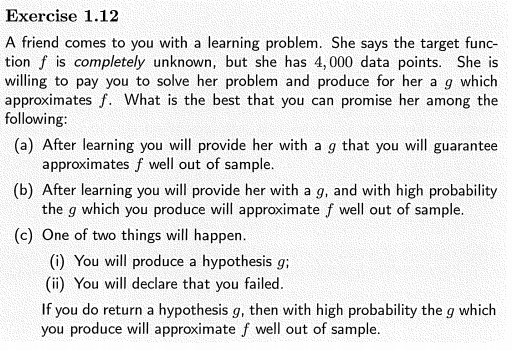

La mejor promesa que podemos hacer es $(c)$, $(a)$ garantiza que $g$ se comporta como $f$ pero esto no es posible porque solo tenemos una muestra del dominio de $f$ que puede ser incluso infinito, $(b)$ tampoco se garantiza porque no siempre es posible aprender, vimos un ejemplo en clase donde $f$ puede ser una función binaria donde no es claro el por qué toma un valor o el otro lo que causaba que para la misma función existian diferentes hipotésis. \\
No obstante, si no ocurre que hemos fallado en producir una hipotésis $g$, hemos estudiado que con alta probabilidad $g$ se comporta como $f$ fuera de los valores de muestra.

##Problema 1.2 

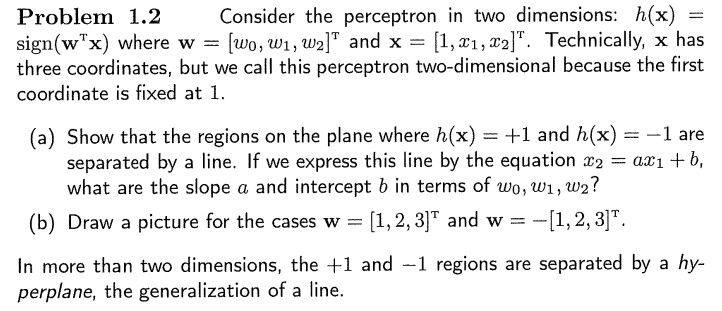

###(a)
Las regiones son separadas por una recta, debido a que la función signo no se define para aquellos valores donde $w^Tx = 0$, estos valores son justamente aquellos perteneciente a la recta y podemos hallar la ecuación tal que:
$$w_0 + w_1x_1 + w_2x_2 = 0$$
$$x_2 = -\frac{w_0}{w_2} - \frac{x_1w_1}{w_2}$$, la pendiente es $-\frac{w_1}{w_2}$ y el intercepto es $-\frac{w_0}{w_2}$

###(b) 
Caso $w = [1,2,3]^T$ \\
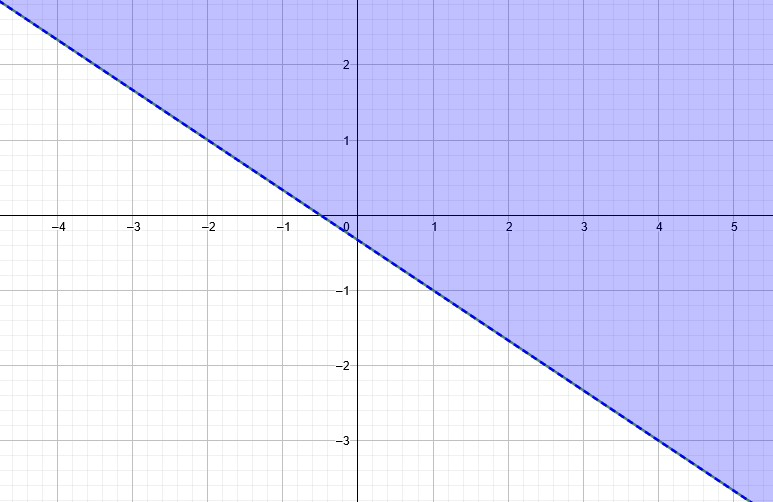

El conjunto azul es el conjunto de puntos donde la función signo es positiva, siendo la línea punteada el conjunto donde la función signo no está definida al valer 0. El conjunto blanco es justamente el conjunto donde la función signo es negativa. Lo interesante es que el caso siguiente, la recta que separa a ambos conjuntos es la misma solo que los conjuntos positivos y negativos se invierten. Lo cual tiene sentido viendolo desde las ecuaciones, pues si la función signo es cero, al multiplicar por $-1$ sigue siendo cero, pero si es mayor o menor a cero, la desigualdad se invierte.

Caso $w = [-1,-2,-3]^T$ \\
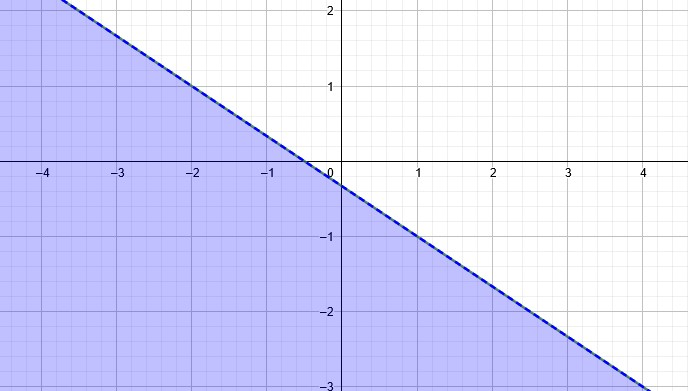


##Problema 1.4


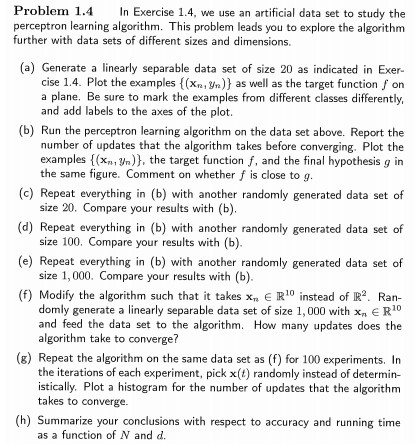

###(a)


In [ ]:
#seed y funcion de número aleátorio
np.random.seed(13)
def ran(min, max):
  return np.random.random()*(max-min) + min
#Primero generamos la recta con los tres parámetros necesarios.
w0 = ran(-100,100)
w1 = ran(-100,100)
w2 = ran(-100,100)
#Definimos una función para verificar que un punto no pertenezca a la recta
def value(w0,w1,w2,x):
  return  x*-w1/(w2+0.0) - w0/(w2+0.0)
def side(w0,w1,w2,x,y):
  if w1*x+w2*y+w0 > 0:
    return  1 
  elif w1*x+w2*y+w0 < 0:
    return -1
def func(w0, w1, w2, x,y, tol = 0.1):
  z = value(w0,w1,w2,x)
  return np.abs(y-z) > tol
#Definimos función para generar data set según dos parámetros y una recta
def genSet(w0, w1, w2, min, max, size):
  y = np.zeros(size)
  x = np.zeros(size)
  val = np.zeros(size)
  for i in range(size):
    x[i] = ran(-100,100)
    y[i]= ran(-100,100)
    while not func(w0,w1,w2,x[i],y[i]):
      y[i] = ran(-100,100)
    val[i] = side(w0,w1,w2,x[i],y[i])
  return x,y,val
#Función para graficar puntos
def plotPuntos(x,y,val,siz):
  l = 0
  for i in range(siz):
    if val[i] == 1:
      l += 1
  x1 = np.zeros(l)
  y1 = np.zeros(l)
  x2 = np.zeros(siz-l)
  y2 = np.zeros(siz-l)
  l1 = l2 = 0
  for i in range(siz):
    if val[i] == 1:
      x1[l1] = x[i]
      y1[l1] = y[i]
      l1 += 1
    else:
      x2[l2] = x[i]
      y2[l2] = y[i]
      l2 += 1
  plt.scatter(x1,y1,c='r', s = 20)
  plt.scatter(x2,y2,c='b', s = 20)

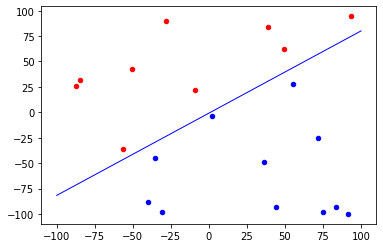

In [ ]:
x, y, val = genSet(w0,w1,w2,-100,100,20)
plotPuntos(x,y,val,20)
x3 = np.linspace(-100,100,500)
y3 = np.zeros(500)
for i in range(500):
  y3[i] = value(w0,w1,w2,x3[i])
plt.plot(x3, y3, 'b', linewidth=1)
plt.show()

###(b) 


In [ ]:
#Perceptron algorithm
def perceptron(x,y,val, size):
  w0 = w1 = w2 = 0
  correct = False 
  num = 0
  while not correct:
    correct = True
    for i in range(size):
      sid = side(w0,w1,w2,x[i],y[i])
      if sid != val[i]:
        correct = False
        w0 = w0 + val[i]
        w1 = w1 + val[i]*x[i]
        w2 = w2 + val[i]*y[i]
        num += 1
        continue
  return w0,w1,w2, num

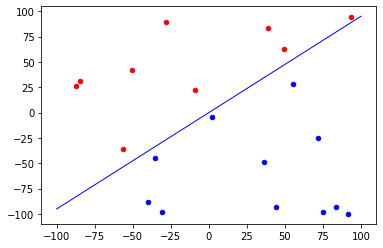

El número de actualizaciones fue: 9
Recta inicial:  w0 =  55.540482114764046 ,w1 -52.49175599301754 ,w2= 64.8557065322737
Recta hallada:  w0 =  1.0 ,w1 -113.95336701168478 ,w2= 119.82641388422488


In [ ]:
v0,v1,v2, num = perceptron(x,y,val,20)
plotPuntos(x,y,val,20)
x3 = np.linspace(-100,100,500)
y3 = np.zeros(500)
for i in range(500):
  y3[i] = value(v0,v1,v2,x3[i])
plt.plot(x3, y3, 'b',linewidth=1)
plt.show()
print("El número de actualizaciones fue:", num)
print("Recta inicial: ", "w0 = ", w0,",w1",w1,",w2=",w2)
print("Recta hallada: ", "w0 = ", v0,",w1",v1,",w2=",v2)

El número de actualizaciones requeridas para converger fue bastante bajo, si bien la recta $g$ parece ser bastante similar a la inicial $f$, los valores de $w$ para cada una son diferentes.

###(c)


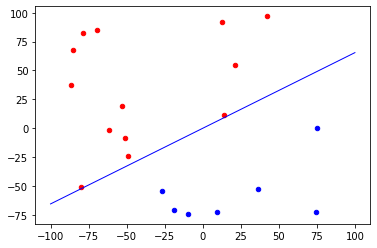

El número de actualizaciones fue: 2
Recta inicial:  w0 =  55.540482114764046 ,w1 -52.49175599301754 ,w2= 64.8557065322737
Recta hallada:  w0 =  2.0 ,w1 -30.197093834059736 ,w2= 46.092915391464345


In [ ]:
x,y,val = genSet(w0,w1,w2,-100,100,20)
v0,v1,v2, num = perceptron(x,y,val,20)
plotPuntos(x,y,val,20)
x3 = np.linspace(-100,100,500)
y3 = np.zeros(500)
for i in range(500):
  y3[i] = value(v0,v1,v2,x3[i])
plt.plot(x3, y3, 'b',linewidth=1)
plt.show()
print("El número de actualizaciones fue:", num)
print("Recta inicial: ", "w0 = ", w0,",w1",w1,",w2=",w2)
print("Recta hallada: ", "w0 = ", v0,",w1",v1,",w2=",v2)

El número de actualizaciones siguió siendo pequeño, esta vez incluso más. 

###(d)

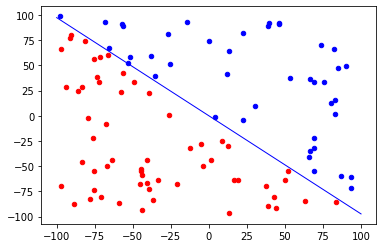

El número de actualizaciones fue: 19
Recta inicial:  w0 =  52.113535353478 ,w1 -119.3463699543539 ,w2= -129.70805471472735
Recta hallada:  w0 =  9.0 ,w1 -158.5242949090416 ,w2= -162.71770162682378


In [ ]:
w0 = ran(-100,100)
w1 = ran(-200,200)
w2 = ran(-200,200)
x,y,val = genSet(w0,w1,w2,-100,100,100)
v0,v1,v2, num = perceptron(x,y,val,100)
plotPuntos(x,y,val,100)
x3 = np.linspace(-100,100,500)
y3 = np.zeros(500)
for i in range(500):
  y3[i] = value(v0,v1,v2,x3[i])
plt.plot(x3, y3, 'b',linewidth=1)
plt.show()
print("El número de actualizaciones fue:", num)
print("Recta inicial: ", "w0 = ", w0,",w1",w1,",w2=",w2)
print("Recta hallada: ", "w0 = ", v0,",w1",v1,",w2=",v2)

El número de actualizaciones no aumentó de forma considerable.

###(e)

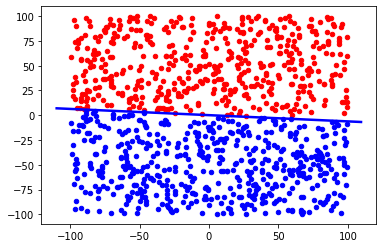

El número de actualizaciones fue: 474
Recta inicial:  w0 =  -99.84425729850118 ,w1 19.35761684799987 ,w2= 310.7845720108535
Recta hallada:  w0 =  -136.0 ,w1 73.91471616335119 ,w2= 1173.640369620307


In [ ]:
w0 = ran(-100,-1)
w1 = ran(10,50)
w2 = ran(100,500)
x,y,val = genSet(w0,w1,w2,-500,500,1000)
v0,v1,v2, num = perceptron(x,y,val,1000)
plotPuntos(x,y,val,1000)
xmin = 500
for i in range(1000):
  if xmin > x[i]:
    xmin = x[i]
xmin -= 10
xmax = -500
for i in range(1000):
  if xmax < x[i]:
    xmax = x[i]
xmax += 10
x3 = np.linspace(xmin,xmax,500)
y3 = np.zeros(500)
for i in range(500):
  y3[i] = value(v0,v1,v2,x3[i])
plt.plot(x3, y3, 'b',linewidth=2.5)
plt.show()
print("El número de actualizaciones fue:", num)
print("Recta inicial: ", "w0 = ", w0,",w1",w1,",w2=",w2)
print("Recta hallada: ", "w0 = ", v0,",w1",v1,",w2=",v2)

El número de iteraciones aumentó considerablemente.

###(f)

In [ ]:
w = np.zeros(11)
for i in range(11):
  w[i] = ran(-100,100)
#Definimos una función para verificar que un punto no pertenezca a la recta
def side(w,x):
  if np.dot(w,x) > 0:
    return  1 
  elif np.dot(w,x) < 0:
    return -1
def noRecta(w, x, tol = 1e-10):
  z = np.dot(w,x)
  return np.abs(z) > tol
#Definimos función para generar data set según dos parámetros y una recta
def genSet(w, min, max, size):
  conj = np.zeros((size,11))
  val = np.zeros(size)
  for i in range(size):
    conj[i][0] = 1
    for j in range(10):
      conj[i][j+1] = ran(min,max)
    while not noRecta(w,conj[i]):
      conj[i][10] = ran(-100,100)
    val[i] = side(w,conj[i])
  return conj,val
#Perceptron
def perceptron(conj,val, size):
  w = np.zeros(11)
  correct = False 
  num = 0
  while not correct:
    correct = True
    for i in range(size):
      sid = side(w,conj[i])
      if sid != val[i]:
        correct = False
        w = w + conj[i]*val[i]
        num += 1
        continue
  return w,num

In [ ]:
conj,val = genSet(w,-100,100,1000)
w, num = perceptron(conj,val,1000)
print(num)

8127


El número de iteraciones incrementó bastante. Pasando de aproximadamente 500 a alrededor de 8000.

###(g)

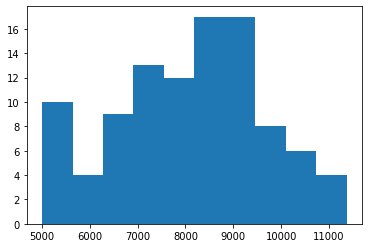

In [ ]:
#Perceptron with random selection
def perceptronRan(conj,val, size):
  w = np.zeros(11)
  correct = False 
  num = 0
  while not correct:
    correct = True
    z = []
    for i in range(size):
      sid = side(w,conj[i])
      if sid != val[i]:
        correct = False
        z.append(i)
    if not correct:
      nume = np.random.randint(0,len(z))   
      w = w + conj[z[nume]]*val[z[nume]]
      num += 1
  return w,num
iter = np.zeros(100)
ma = 1
for i in range(100):
  z, num = perceptronRan(conj,val,1000)
  if ma < num:
    ma = num
  iter[i] = num
plt.hist(iter)
plt.show()

Vemos que el número de actualizaciones es bastante grande. En un tercio de los casos fue un valor entre 8000 y 9000, siempre siendo al menos de 5000.

###(h)

La presición es proporcional al número de puntos que tengamos, a si mismo, el tiempo de ejecución es proporcional a la dimensión en la que trabajemos. Es decir, a mayor números de datos, mejor aproxima $g$ a $f$ y mientras mayor sea $d$, nos tomará mas tiempo lograr dar con una $g$.

##Problema 1.6


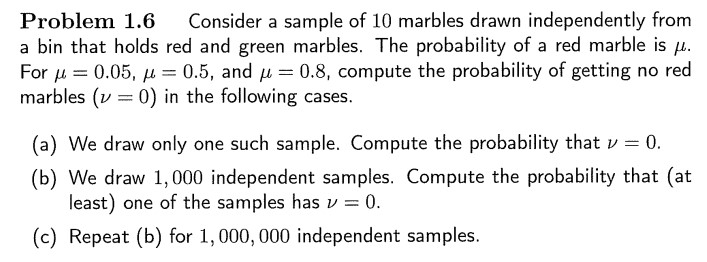

###(a)


$\mu = 0.05$ \\
La probabilidad de que ninguna bola obtenida sea roja, es igual a que cada bola que saque de la canasta sea verde, es decir $(1-\mu)^{10}$.

In [ ]:
samples = 1
marbles = 10
mu = 0.05
prob = 1
for i in range(marbles):
  prob = prob * (1-mu)
print("La probabilidad es", prob)

La probabilidad es 0.5987369392383786


$\mu = 0.5$

In [ ]:
samples = 1
marbles = 10
mu = 0.5
prob = 1
for i in range(marbles):
  prob = prob * (1-mu)
print("La probabilidad es", prob)

La probabilidad es 0.0009765625


El evento es menos probable, pues es más probable sacar una bola roja.

$\mu = 0.8$

In [ ]:
samples = 1
marbles = 10
mu = 0.8
prob = 1
for i in range(marbles):
  prob = prob * (1-mu)
print("La probabilidad es", prob)

La probabilidad es 1.0239999999999977e-07


La probabilidad es muy baja, lo cual concuerda con el hecho de que aproximadamente en 8 de 10 casos sacamos una bola roja.

###(b)


Si $p$ es la probabilidad de que ninguna bola sea roja, entonces la probabilidad que buscamos es $1 - (1-p)^n$ donde $(1-p)^n$ es igual a la probabilidad de que de $n$ muestras, ninguna de ellas tenga cero bolas rojas.

$\mu = 0.05$

In [ ]:
samples = 1000
marbles = 10
mu = 0.05
prob = 1
for i in range(marbles):
  prob = prob * (1-mu)
print("La probabilidad es", 1- pow(1-prob,samples))

La probabilidad es 1.0


El evento es muy probable, siendo aproximado a 1 por su cercania


$\mu = 0.5$

In [ ]:
samples = 1000
marbles = 10
mu = 0.5
prob = 1
for i in range(marbles):
  prob = prob * (1-mu)
print("La probabilidad es", 1- pow(1-prob,samples))

La probabilidad es 0.623576201943276


$\mu = 0.8$

In [ ]:
samples = 1000
marbles = 10
mu = 0.8
prob = 1
for i in range(marbles):
  prob = prob * (1-mu)
print("La probabilidad es", 1- pow(1-prob,samples))

La probabilidad es 0.00010239476257623004


###(c) 

La probabilidad se calcula de forma similar, simplemente cambiamos el valor de $n$

In [ ]:
samples = 1000000
marbles = 10
mu = 0.05
prob = 1
for i in range(marbles):
  prob = prob * (1-mu)
print("La probabilidad es", 1- pow(1-prob,samples))

La probabilidad es 1.0


In [ ]:
samples = 1000000
marbles = 10
mu = 0.5
prob = 1
for i in range(marbles):
  prob = prob * (1-mu)
print("La probabilidad es", 1- pow(1-prob,samples))

La probabilidad es 1.0


Para $\mu \leq 0.5$ el evento es muy probable como comprobamos en los dos casos de arriba.

In [ ]:
samples = 1000000
marbles = 10
mu = 0.8
prob = 1
for i in range(marbles):
  prob = prob * (1-mu)
print("La probabilidad es", 1- pow(1-prob,samples))

La probabilidad es 0.09733159268316072


El evento no es muy probable, pero en comparación al valor que toma si se tomaban 1000 muestras, es considerablemente mas probable.

##Problema 1.9 

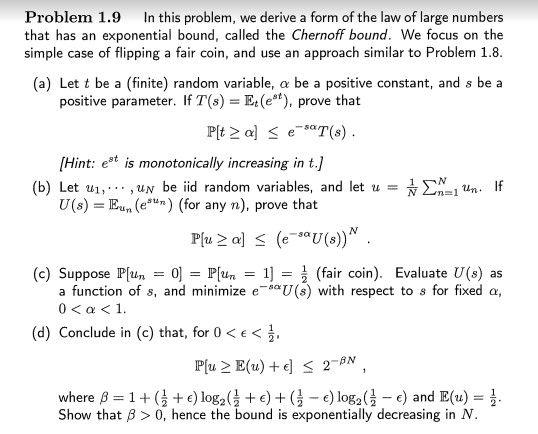

###a)

$$P(t \geq \alpha) = P(st \geq s\alpha)$$
Pues $s$ es positiva, además
$$P(st \geq s\alpha) = P(e^{st} \geq e^{s\alpha}) $$
Porque $e^t$ es monótona creciente.
$$P(e^{st} \geq e^{s\alpha}) \leq \frac{E(e^{st})} {e^{st}} = e^{-s\alpha}T(s)$$
Por la desigualdad de Markov. \\
Finalmente:
$$P(t \geq \alpha) \leq  e^{-s\alpha}T(s)$$

###b)

$$P(u \geq \alpha) = P(Nu \geq N\alpha) \leq e^{-sN\alpha}E(e^{sNu})$$
Pues $N$ es positivo y por el literal $(a)$
$$e^{-sN\alpha}E(e^{sNu}) = e^{-sN\alpha}E(e^{s\sum_{n=1}^{N}u_n})  = e^{-sN\alpha}\prod_{n=1}^{N}E(e^{su_n}) $$
Pues las variables aleátorias son iid \\
Finalmente:
$$P(u \geq \alpha) \leq  e^{-sN\alpha}\prod_{n=1}^{N}E(e^{su_n}) = (e^{-s\alpha}E(e^{su_n}))^N$$

###c)

$$U(s) = E(e^{su_n}) = e^{s0}P(u_n = 0) + e^{s}P(u_n=1) = \frac{1}{2}(1+e^s)$$
Así,
$$e^{-s\alpha}U(s) = \frac{e^{-s\alpha}}{2}(1+e^s)$$
Para hallar el mínimo utilizamos derivadas, sea $f(s) = e^{-s\alpha}U(s)$ Luego, 
$$f'(s) = -\frac{e^{-s\alpha}}{2}\alpha + \frac{e^{s(1-\alpha)}}{2}(1-\alpha) = \frac{1}{2}e^{-s\alpha}(-\alpha + e^s(1-\alpha))$$
Si igualamos la derivada a $0$ nos queda que
$$(-\alpha +  e^s(1-\alpha)) = 0$$ de donde despejamos y tenemos que $s = ln(\frac{\alpha}{1-\alpha})$ \\
Para ver que es el mínimo, se deriva de nuevo la función y se ve que la segunda derivada es positiva en todo su dominio, es decir, la función es cóncava hacía arriba y la función evaluada en el valor de $s$ hallado alcanza su menor valor. 


###d)

Primero, 
$$E(u) = \frac{1}{N} \sum_{n=1}^NE(u_n)$$ de donde al ser u_1,..,u_N iid se tiene que 
$$E(u) = E(u_N) = 0\cdot\frac{1}{2} + 1\cdot\frac{1}{2} = \frac{1}{2}$$
Así, 
$$P(u \geq E(u)+\epsilon) = P(u \geq \frac{1}{2}+\epsilon) \leq (e^{-s(\frac{1}{2}+\epsilon)}U(s))^N$$
con $s$ el mínimo de la función definida en el literal anterior. La anterior desigualdad ocurre por el literal $(b)$ ya que fue demostrada para un $s$ arbitrario. \\
Resta evaluar esa expresión con el valor mínimo de $s$ y obtenemos la expresión deseada
$$(e^{-s(\frac{1}{2}+\epsilon)}U(s))^N = (e^{-ln(\frac{\frac{1}{2}+\epsilon}{1-\frac{1}{2}+\epsilon})\frac{1}{2}+\epsilon}\frac{1}{2}(1 + e^{ln(\frac{\frac{1}{2}+\epsilon}{1-\frac{1}{2}+\epsilon})}))^N = (\frac{1}{2})(\frac{1/2-\epsilon}{1/2+\epsilon})^{1/2+\epsilon})(1+\frac{1/2+\epsilon}{1/2-\epsilon})^N$$
$$={2^{(-1-log_2(1/2+\epsilon)^{1/2+\epsilon}-log(1/2-\epsilon)^{1/2-\epsilon})}}^N = {2^{1 + (1/2-\epsilon)log_2(1/2-\epsilon) + (\epsilon + 1/2)log_2(1/2+\epsilon)}}^{-N} = 2^{-\beta N}$$
Para ver que $\beta > 0$, podemos definir una función con parámetro $\epsilon$ y ver el comportamiento a lo largo de sus extremos.

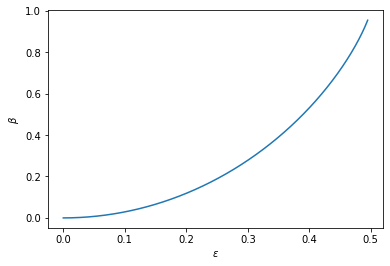

In [ ]:
def f(eps):
  return 1 + (1/2+ eps)*np.log2(1/2+eps)+(1/2-eps)*np.log2(1/2-eps)
array1 = np.zeros(5000)
array2= np.zeros(5000)
array1[0] = 0.0
array2[0] = f(array1[0])
for i in range(4999):
  array1[i+1] = 0.000099 + array1[i]
  array2[i+1] = f(array1[i+1])
plt.plot(array1,array2)
plt.ylabel(r'$\beta$')
plt.xlabel(r'$\epsilon$')
plt.show()

##Problema 1.12 

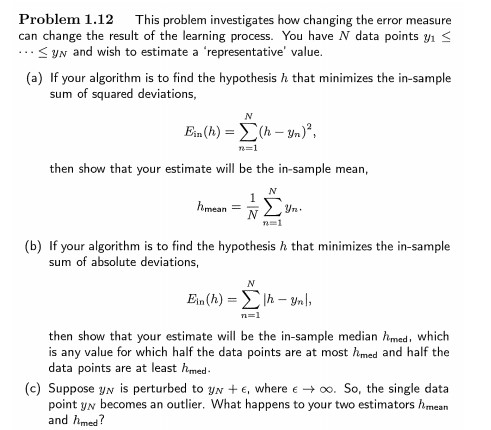

###a)

Sea $f(h) = E_{in}(h) = \sum_{n=1}^N(h-y_n)^2$. La función $f$ es diferenciable, por lo que procedemos a buscar un punto crítico y verificar si es el mínimo. Así,
$$f'(h) = 2\sum_{n=1}^N(h-y_n) = 2(Nh-\sum_{n=1}^Ny_n)$$
Al igualar la derivada a 0, obtenemos que un punto crítico es: $\frac{\sum_{n=1}^Ny_n}{N} = h_{mean}$ \\
Para ver que es el mínimo, derivamos de nuevo a $f'(h)$ y vemos que $f''(h) = 2N > 0$, siendo $f$ concáva hacia arriba.

###b)

Sea $g(h) = E_{in}(h) = \sum_{n=1}^N|h-y_n|$, esta función no es directamente diferenciable, pero podemos considerar casos respecto a $h$ y separar la suma como una suma de valores absolutos. Dado un $n$ si $h > y_n$ entonces $|h-y_n| = h - y_n$ y al derivar este término la derivada es $1$. Así mismo, si $h < y_n$ la derivada es $-1$. Si $h =  y_n$ el término se anula. En este caso, el candidato a ser punto crítico es aquel que anule la derivada. Para que la suma de las derivadas de los terminos sean $0$, $h$ debe ser mayor a tantos términos $y_n$ como menor a. De allí, vemos que si tomamos la mediana de $y_1,y_2,..,y_N$ ocurre que la mediana será mayor a tantos términos como menor a, y al sumar la derivada de la función dara 0. Obteniendo un punto crítico que resulta ser el mínimo si consideramos puntos cercanos a él. 

###c)

Si $y_N := y_N + \epsilon$ con $\epsilon -> \infty$ vemos que la media $h_{mean}$ también tiende a infinito pues $y_N$ despreciaría el resto de valores dentro del cálculo de la media. En cambio, $h_{med}$ la mediana, permanecería igual en la mayoría de casos, puesto que $y_N$ es el último valor, y solo afectaría el valor intermedio si $N \leq 2$ siendo en tales casos la mediana también $\infty$. 